In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
features_train = pd.read_csv("train.csv")
features_test = pd.read_csv("test.csv")

labels_train = features_train['Activity']
labels_test = features_test['Activity']

features_train.drop(['Activity','subject'], axis = 1, inplace = True)
features_test.drop(['Activity','subject'], axis = 1, inplace = True)

In [3]:
features_train.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X          ...           \
0         -0.923527         -0.934724          ...            
1         -0.957686         -0.943068          ...            
2         -0.977469         -0.938692          ...            
3         -0.989302         -0.938692          ...            
4         -0.990441         -0.942469          ...            

   fBodyBodyGyroJerkMag-meanFreq()  fBodyBodyGyroJerkMag-skewness()  \
0                        -0.074323                        -0.298676   
1                         0.158075                        -0.595051   
2                         0.414503                        -0.390748   
3                         0.404573                        -0.117290   
4                         0.087753                        -0.351471   

   fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                        -0.710304                    -0.112754   
1                        -0.861499                     0.053477   
2                        -0.760104                    -0.118559   
3                        -0.482845                    -0.036788   
4                        -0.699205                     0.123320   

   angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                              0.030400                         -0.464761   
1                             -0.007435                         -0.732626   
2                              0.177899                          0.100699   
3                             -0.012892                          0.640011   
4                              0.122542                          0.693578   

   angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
0                             -0.018446             -0.841247   
1                              0.703511             -0.844788   
2                              0.808529             -0.848933   
3                             -0.485366             -0.848649   
4                             -0.615971             -0.847865   

   angle(Y,gravityMean)  angle(Z,gravityMean)  
0              0.179941             -0.058627  
1              0.180289             -0.054317  
2              0.180637             -0.049118  
3              0.181935             -0.047663  
4              0.185151             -0.043892  

[5 rows x 561 columns]

In [4]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [5]:
features_train.describe()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.000000         -0.999873         -1.000000         -1.000000   
25%           -0.992754         -0.978129         -0.980233         -0.993591   
50%           -0.946196         -0.851897         -0.859365         -0.950709   
75%           -0.242813         -0.034231         -0.262415         -0.292680   
max            1.000000          0.916238          1.000000          1.000000   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  \
count       7352.000000       7352.000000       7352.000000   
mean          -0.526907         -0.606150         -0.468604   
std            0.485942          0.414122          0.544547   
min           -1.000000         -1.000000         -1.000000   
25%           -0.978162         -0.980251         -0.936219   
50%           -0.857328         -0.857143         -0.881637   
75%           -0.066701         -0.265671         -0.017129   
max            0.967664          1.000000          1.000000   

               ...           fBodyBodyGyroJerkMag-meanFreq()  \
count          ...                               7352.000000   
mean           ...                                  0.125293   
std            ...                                  0.250994   
min            ...                                 -1.000000   
25%            ...                                 -0.023692   
50%            ...                                  0.134000   
75%            ...                                  0.289096   
max            ...                                  0.946700   

       fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
count                      7352.000000                      7352.000000   
mean                         -0.307009                        -0.625294   
std                           0.321011                         0.307584   
min                          -0.995357                        -0.999765   
25%                          -0.542602                        -0.845573   
50%                          -0.343685                        -0.711692   
75%                          -0.126979                        -0.503878   
max                           0.989538                         0.956845   

       angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
count                  7352.000000                           7352.000000   
mean                      0.008684                              0.002186   
std                       0.336787                              0.448306   
min                      -0.976580                             -1.000000   
25%                      -0.121527                             -0.289549   
50%                       0.009509                              0.008943   
75%                       0.150865                              0.292861   
max                       1.000000                              1.000000   

       angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
count                       7352.000000                           7352.000000   
mean          

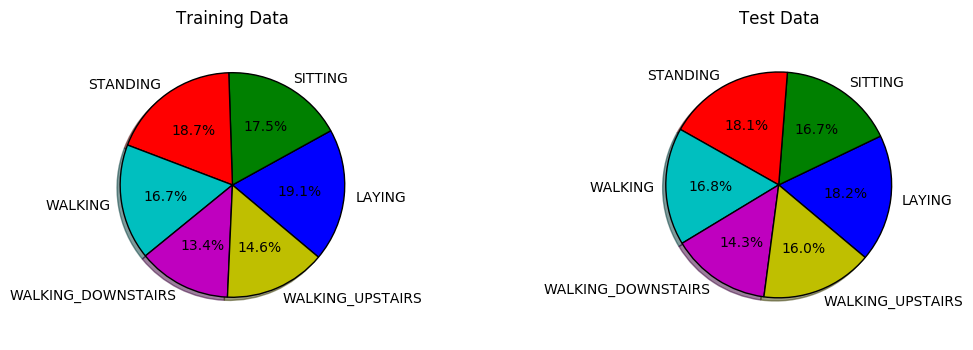

In [6]:
unique_train, counts_train = np.unique(labels_train, return_counts=True)
unique_test, counts_test = np.unique(labels_test, return_counts=True)

plt.figure(figsize=(10,4))

# Pie chart of the training data
plt.subplot(131)
plt.pie(counts_train, labels=unique_train, autopct='%.1f%%', shadow=True, startangle=320)
plt.title('Training Data')
plt.axis('equal')
plt.autoscale()

# Pie chart of the test data
plt.subplot(133)
plt.title('Test Data')
plt.axis('equal')
plt.pie(counts_test, labels=unique_test, autopct='%.1f%%', shadow=True, startangle=320)
plt.autoscale()

In [7]:
# Since there are so many features, we define a method to create a sub scatter matrix of a part of the features
def create_scatter_matrix(data, from_column, to_column):
    number_of_columns = to_column - from_column
    sm = pd.scatter_matrix(data[data.columns[from_column:to_column]], alpha = 0.3, figsize = (12,8), diagonal = 'kde');

    # Iterare throu all subplots to rotate the labels so that they are readable
    for x in range(number_of_columns):
        for y in range(number_of_columns):
            # rotate the labels of the x axis
            sm[x, y].xaxis.label.set_rotation(90)
            # rotate the labels of the y axis
            sm[x, y].yaxis.label.set_rotation(0)
            # move the labels of the y axis outside the plot area
            sm[x, y].yaxis.labelpad = 100

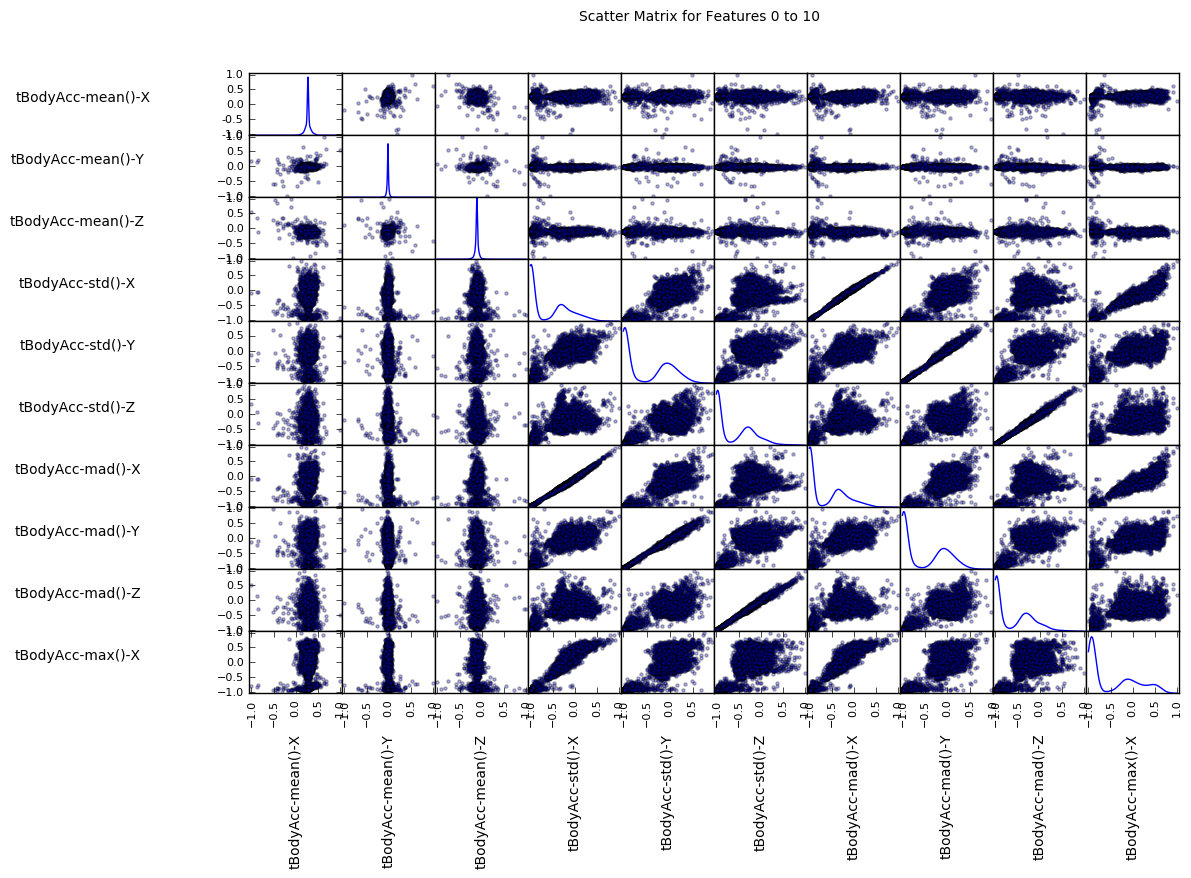

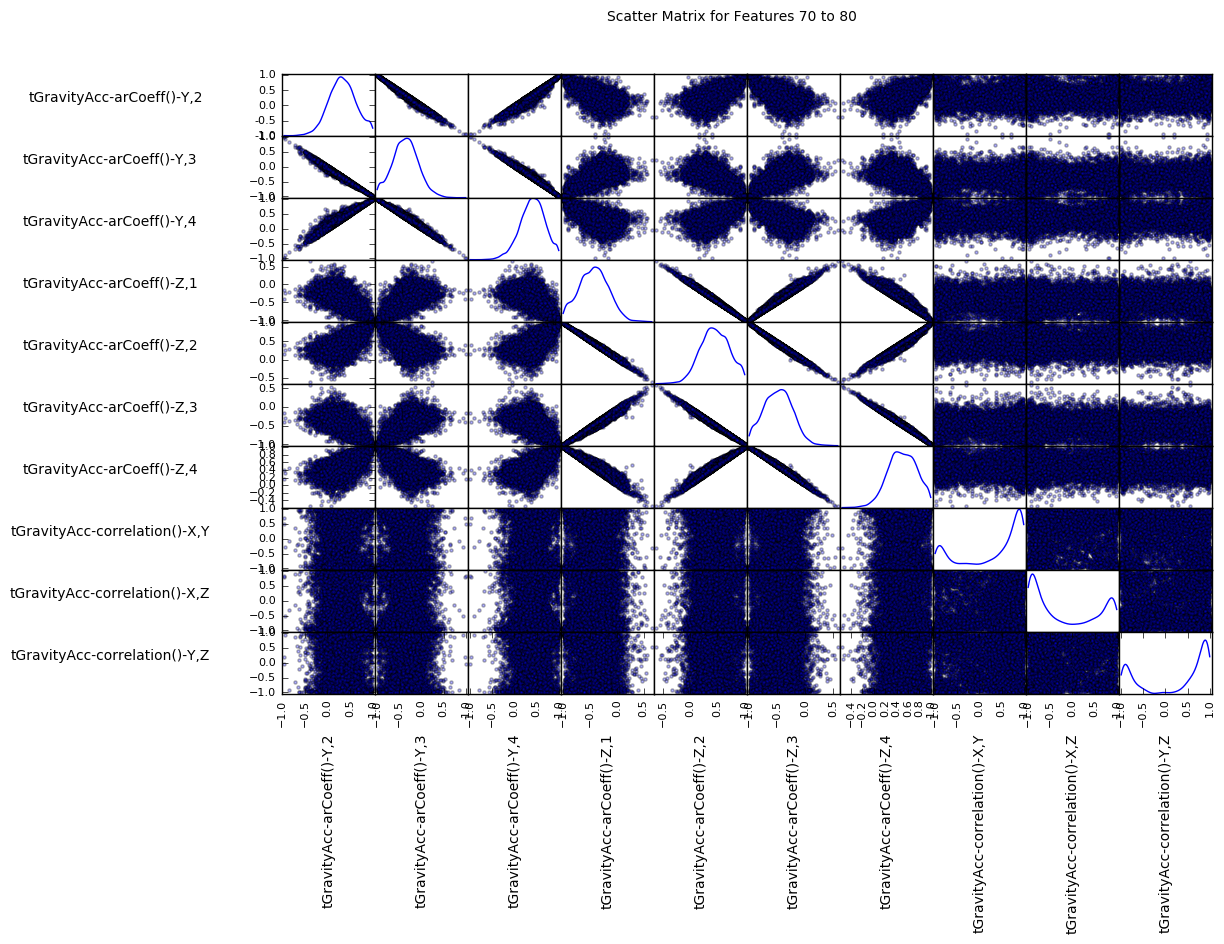

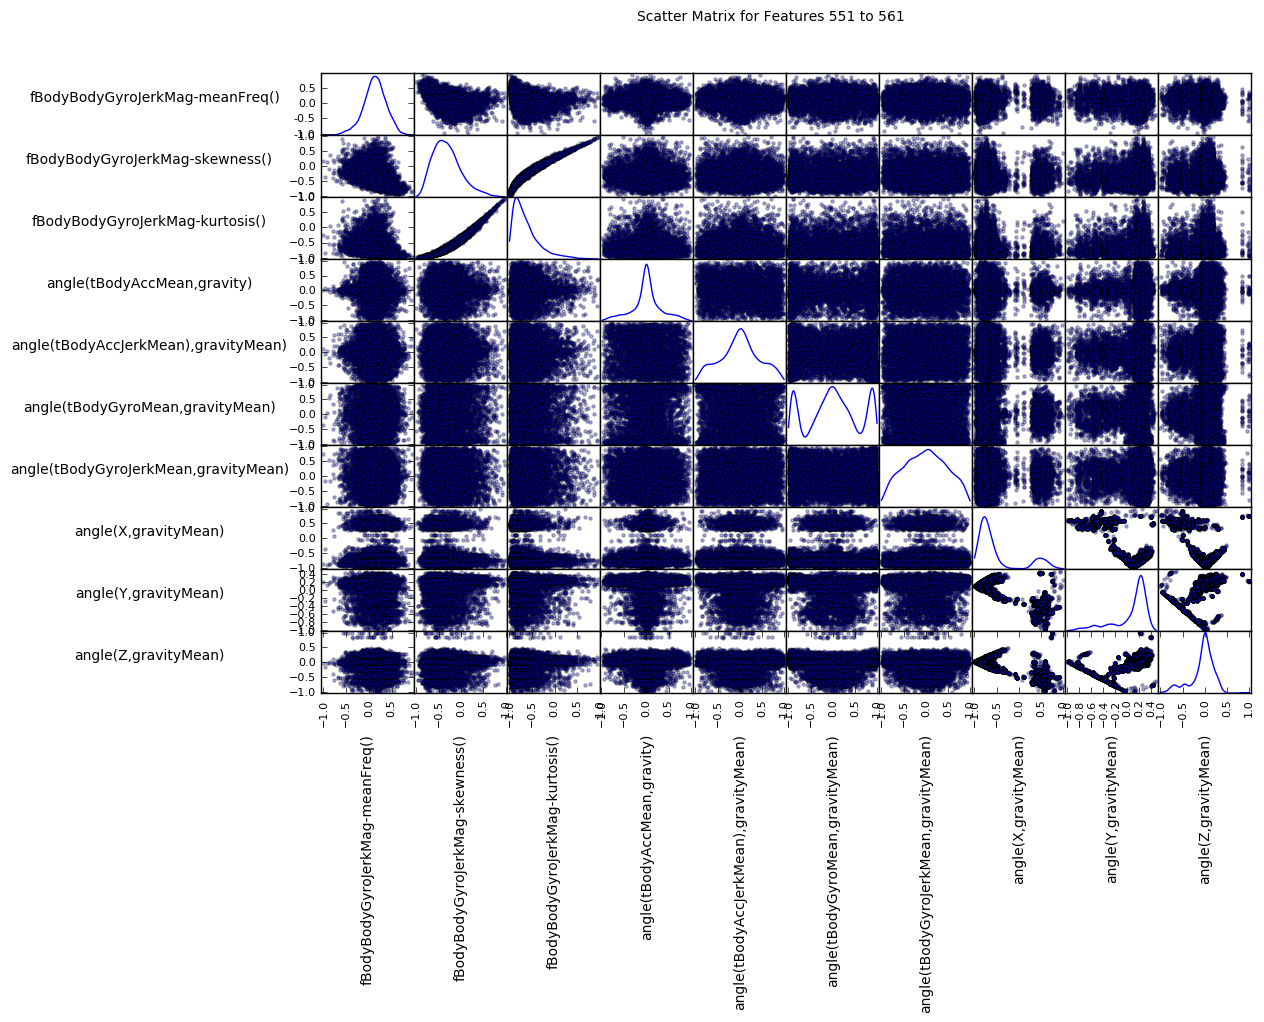

In [8]:
# First look at the correlation of the data. Since there are so many features, we just have a look
# at a few features at a time to get an impression.

# A look at the correlation of the first nine features
create_scatter_matrix(features_train, 0, 10)
plt.suptitle('Scatter Matrix for Features 0 to 10')
# A look at the correlation of some other features further in the middle
create_scatter_matrix(features_train, 70, 80)
plt.suptitle('Scatter Matrix for Features 70 to 80')
# A look at the correlation of the features at the end
create_scatter_matrix(features_train, 551, 561)
plt.suptitle('Scatter Matrix for Features 551 to 561')

In [9]:
# Use a min max scaler to scale the data
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler = min_max_scaler.fit(features_train)
# Scale the training and the testing data
min_max_scaled_features_train = min_max_scaler.transform(features_train)
min_max_scaled_features_test = min_max_scaler.transform(features_test)
# Put the data back into a pandas dataframe
min_max_scaled_features_train = pd.DataFrame(min_max_scaled_features_train, columns = features_train.columns)
min_max_scaled_features_test = pd.DataFrame(min_max_scaled_features_test, columns = features_test.columns)

In [10]:
# Use a standard scaler to scale the data
standard_scaler = preprocessing.StandardScaler()
standard_scaler = standard_scaler.fit(features_train)
# Scale the training and the testing data
standard_scaled_features_train = standard_scaler.transform(features_train)
standard_scaled_features_test = standard_scaler.transform(features_test)
# Put the data back into a pandas dataframe
standard_scaled_features_train = pd.DataFrame(standard_scaled_features_train, columns = features_train.columns)
standard_scaled_features_test = pd.DataFrame(standard_scaled_features_test, columns = features_test.columns)

In [11]:
# Use a robust scaler to scale the data
robust_scaler = preprocessing.RobustScaler()
robust_scaler = robust_scaler.fit(features_train)
# Scale the training and the testing data
robust_scaled_features_train = robust_scaler.transform(features_train)
robust_scaled_features_test = robust_scaler.transform(features_test)
# Put the data back into a pandas dataframe
robust_scaled_features_train = pd.DataFrame(robust_scaled_features_train, columns = features_train.columns)
robust_scaled_features_test = pd.DataFrame(robust_scaled_features_test, columns = features_test.columns)

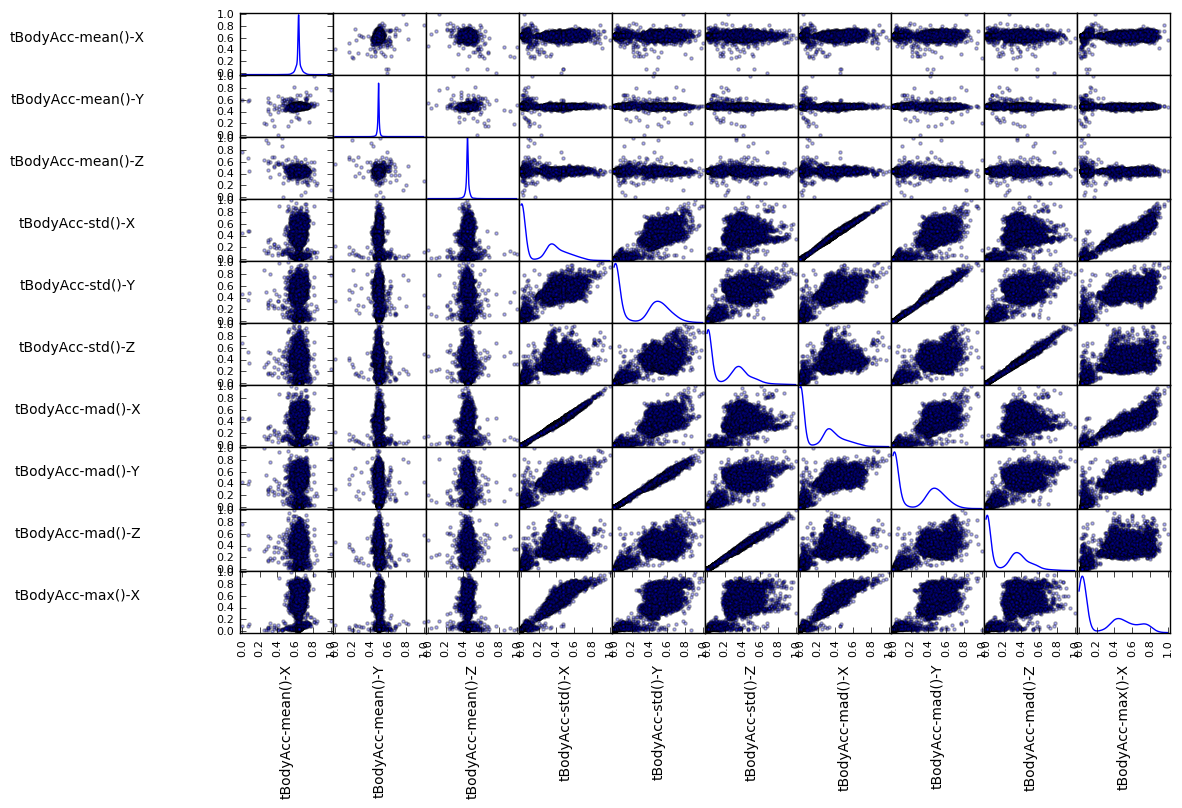

In [12]:
create_scatter_matrix(min_max_scaled_features_train, 0, 10)

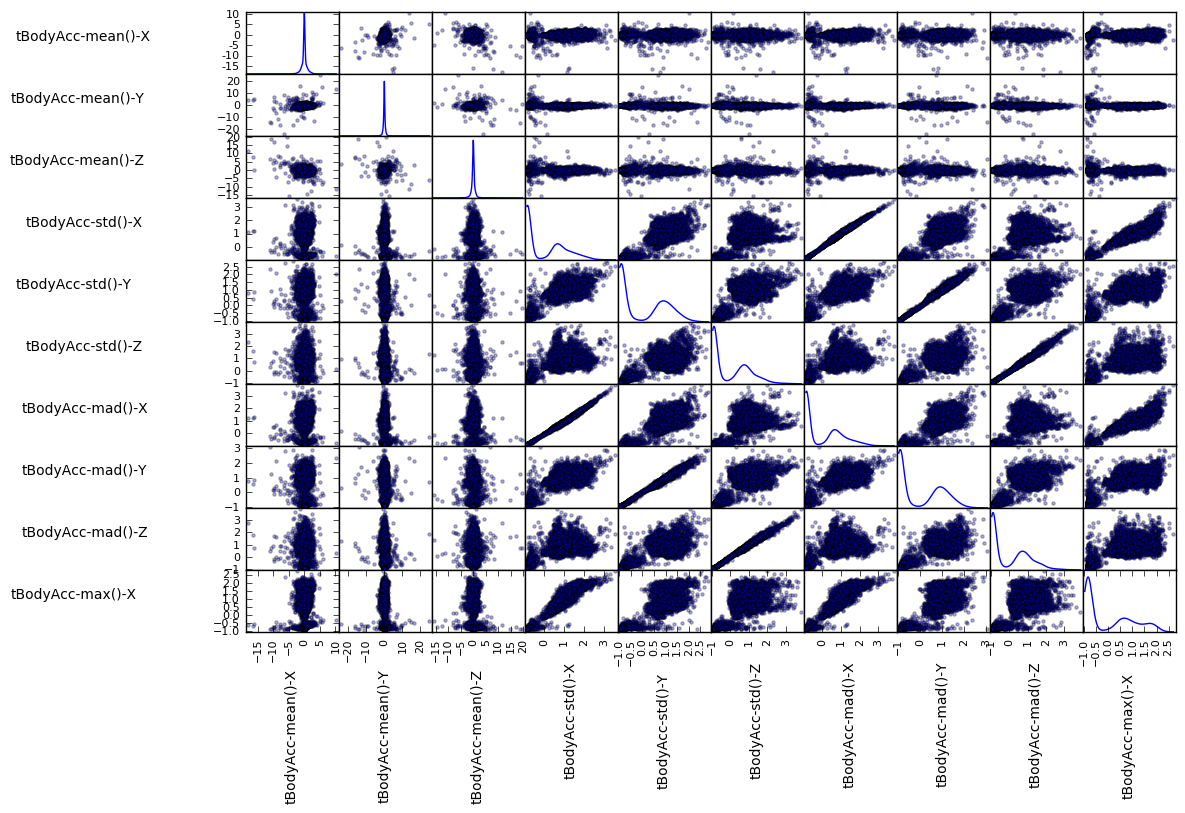

In [13]:
create_scatter_matrix(standard_scaled_features_train, 0, 10)

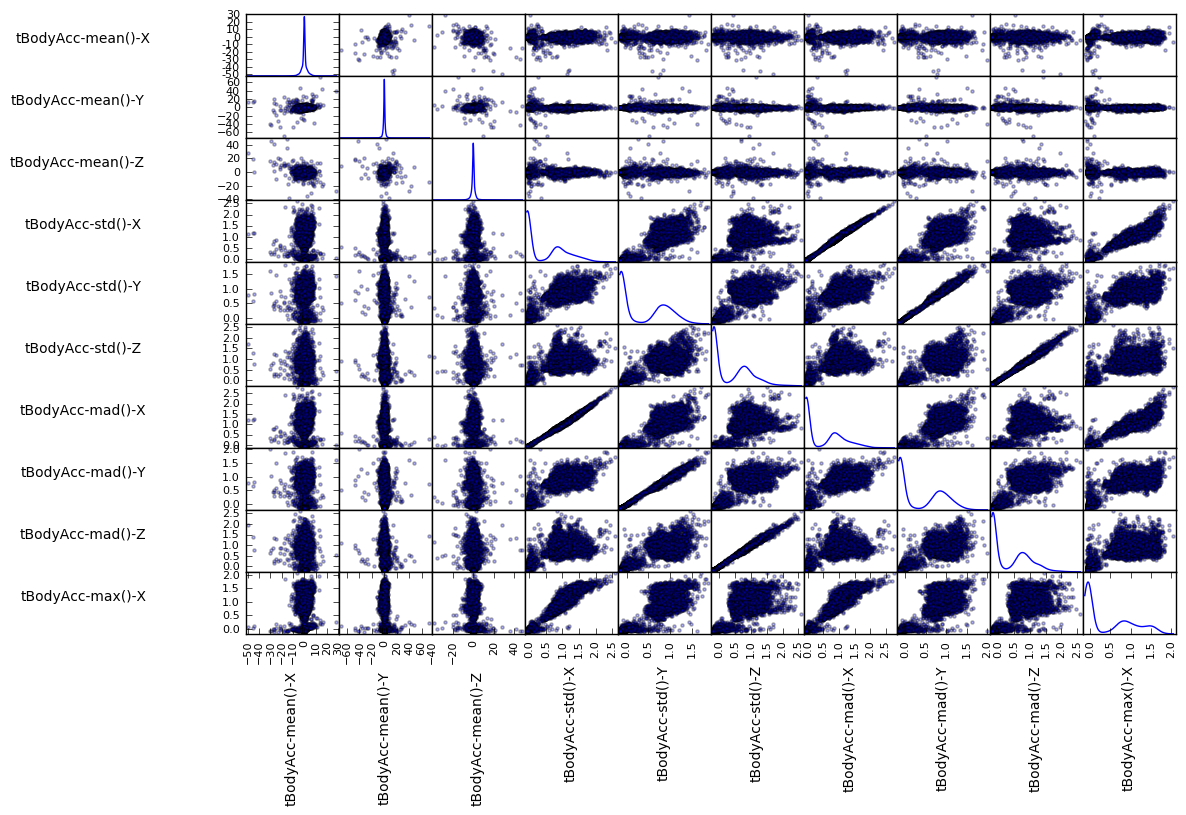

In [14]:
create_scatter_matrix(robust_scaled_features_train, 0, 10)

In [15]:
features_train_removed_outliers = pd.read_csv("train.csv")
features_train_removed_outliers.drop(['subject'], axis = 1, inplace = True)

for feature in features_train.keys():
        
    # Calculate the lower quartile for the feature
    q1 = np.percentile(features_train[feature], 25)
    
    # Calculate the upper quartile for the feature
    q3 = np.percentile(features_train[feature], 75)
    
    # Use the interquartile range to calculate an outlier step
    # The multiplicator is very high! But a lower multiplicator leads to very little data
    step = (q3-q1)*25
    
    # Remove the outlier from the data
    features_train_removed_outliers = features_train_removed_outliers[((features_train[feature] >= q1 - step) & (features_train[feature] <= q3 + step))]

# Extract the labels from the data
labels_train_removed_outliers = features_train_removed_outliers['Activity']
# Remove the labels from the training data
features_train_removed_outliers.drop(['Activity'], axis = 1, inplace = True)
# Show the information about the cleaned data
features_train_removed_outliers.info()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6804 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 29.2 MB


In [16]:
from sklearn.neighbors import KNeighborsClassifier

def run_knn(features_train, features_test, labels_train, labels_test):
    clf = KNeighborsClassifier()
    clf.fit(features_train, labels_train)
    prediction_train = clf.predict(features_train)
    prediction_test = clf.predict(features_test)
    return ['KNN', accuracy_score(prediction_train, labels_train), accuracy_score(prediction_test, labels_test)]

In [17]:
from sklearn.ensemble import AdaBoostClassifier

def run_adaboost(features_train, features_test, labels_train, labels_test):
    clf = AdaBoostClassifier(random_state=42)
    clf.fit(features_train, labels_train)
    prediction_train = clf.predict(features_train)
    prediction_test = clf.predict(features_test)
    return ['AdaBoost', accuracy_score(prediction_train, labels_train), accuracy_score(prediction_test, labels_test)]

In [18]:
from sklearn.neural_network import MLPClassifier

def run_mlp(features_train, features_test, labels_train, labels_test):
    clf = MLPClassifier(random_state=42)
    clf.fit(features_train, labels_train)
    prediction_train = clf.predict(features_train)
    prediction_test = clf.predict(features_test)
    return ['MLP', accuracy_score(prediction_train, labels_train), accuracy_score(prediction_test, labels_test)]

In [19]:
from sklearn.naive_bayes import GaussianNB

def run_gnb(features_train, features_test, labels_train, labels_test):
    clf = GaussianNB()
    clf.fit(features_train, labels_train)
    prediction_train = clf.predict(features_train)
    prediction_test = clf.predict(features_test)
    return ['Naive Bayes', accuracy_score(prediction_train, labels_train), accuracy_score(prediction_test, labels_test)]

In [20]:
from sklearn.svm import SVC

def run_svm(features_train, features_test, labels_train, labels_test):
    clf = SVC(random_state=42)
    clf.fit(features_train, labels_train)
    prediction_train = clf.predict(features_train)
    prediction_test = clf.predict(features_test)
    return ['SVM', accuracy_score(prediction_train, labels_train), accuracy_score(prediction_test, labels_test)]

In [21]:
from sklearn.linear_model import LogisticRegression

def run_log_reg(features_train, features_test, labels_train, labels_test):
    clf = LogisticRegression(random_state=42)
    clf.fit(features_train, labels_train)
    prediction_train = clf.predict(features_train)
    prediction_test = clf.predict(features_test)
    return ['Logistic Regression', accuracy_score(prediction_train, labels_train), accuracy_score(prediction_test, labels_test)]

In [22]:
# Vizualize the scores
def displayResult(transformation, algorithms, training_scores, testing_scores, rotation=0, xlabel='Classifier'):
    
    # The index for the bars
    ind = np.arange(len(algorithms))
    # The width of the bars
    width = 0.4
    # Scale the plot
    fig, ax = plt.subplots(figsize=(11, 6))
    rects1 = ax.bar(ind + 0.1, training_scores, width, color='y')
    rects2 = ax.bar(ind + width + 0.1, testing_scores, width, color='g')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Score')
    ax.set_xticks(ind + 0.1 + width)
    # Assign and rotate the labels of the algorithms
    ax.set_xticklabels(algorithms, rotation=rotation)
    ax.set_title('Model Performance with {}'.format(transformation))
    # Add a legend on the right lower corner
    ax.legend((rects1[0], rects2[0]), ('Training score', 'Testing score'), loc=4)
    
    # Round the accuracy and display it on the bars
    for rect in rects1:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height-0.04, "{:.4f}".format(height), ha='center', va='bottom')
    for rect in rects2:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height-0.04, "{:.4f}".format(height), ha='center', va='bottom')

In [23]:
def run_classifiers(transformation, f_train, f_test, l_train, l_test):
    
    #Run K-Nearest Neighbors
    scores = np.array([run_knn(f_train, f_test, l_train, l_test)])
    
    #Run AdaBoost
    scores = np.concatenate((scores, [run_adaboost(f_train, f_test, l_train, l_test)]), axis=0)
    
    #Run Multi-layer Perceptron
    scores = np.concatenate((scores, [run_mlp(f_train, f_test, l_train, l_test)]), axis=0)
    
    #Run Gaussian Naive Bayes
    scores = np.concatenate((scores, [run_gnb(f_train, f_test, l_train, l_test)]), axis=0)
    
    #Run Support Vector Machines
    scores = np.concatenate((scores, [run_svm(f_train, f_test, l_train, l_test)]), axis=0)
    
    #Run Logistic Regression
    scores = np.concatenate((scores, [run_log_reg(f_train, f_test, l_train, l_test)]), axis=0)
    
    #Transpost the matrix to get the list for visualization
    scores = scores.transpose()
    
    # Display the scores
    displayResult(transformation, scores[0], scores[1], scores[2])

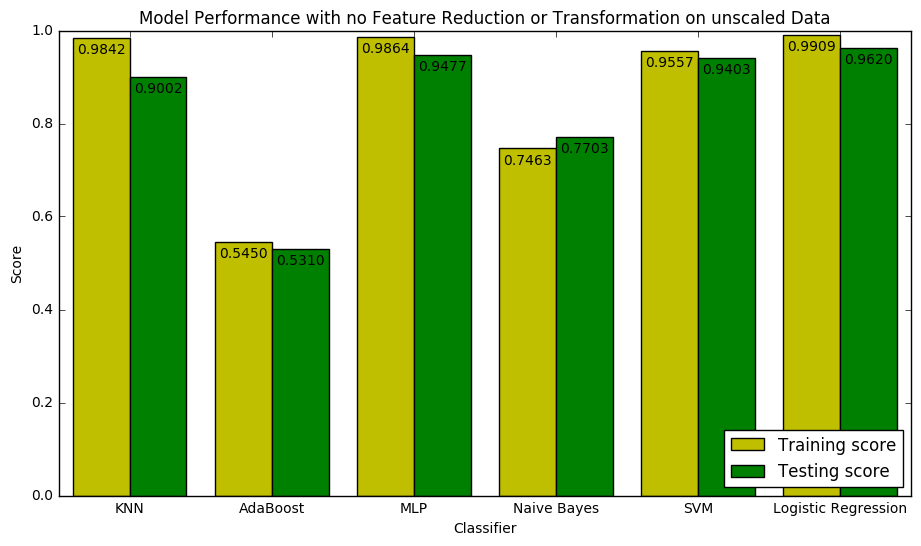

In [24]:
run_classifiers('no Feature Reduction or Transformation on unscaled Data', features_train, features_test, labels_train, labels_test)

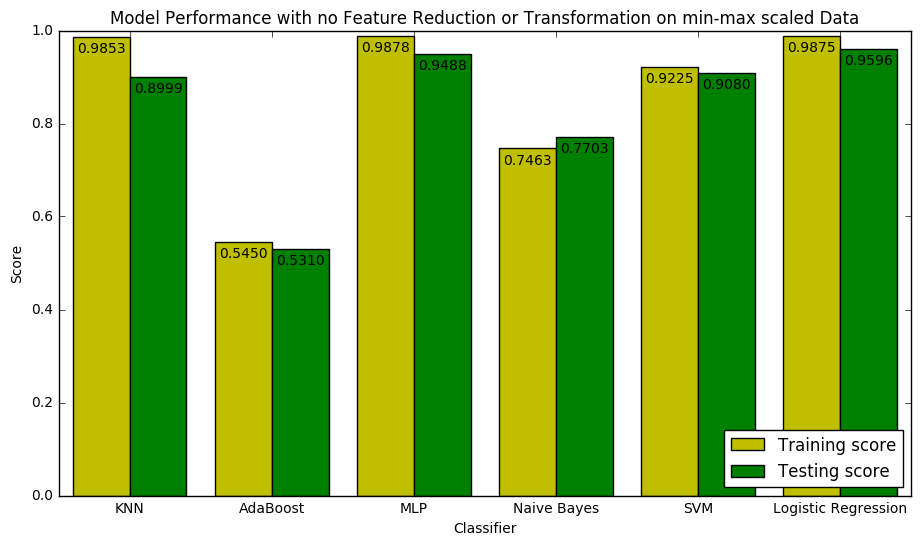

In [25]:
run_classifiers('no Feature Reduction or Transformation on min-max scaled Data', min_max_scaled_features_train, min_max_scaled_features_test, labels_train, labels_test)

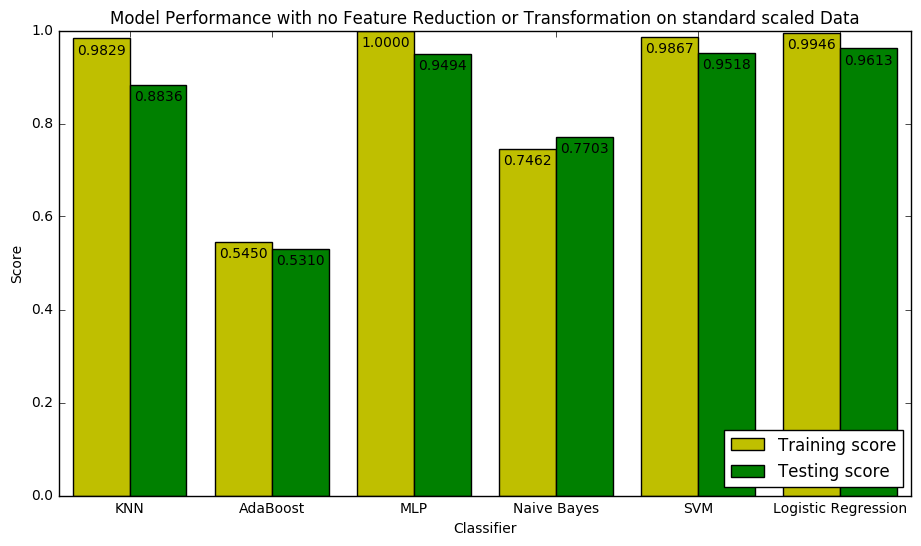

In [26]:
run_classifiers('no Feature Reduction or Transformation on standard scaled Data', standard_scaled_features_train, standard_scaled_features_test, labels_train, labels_test)

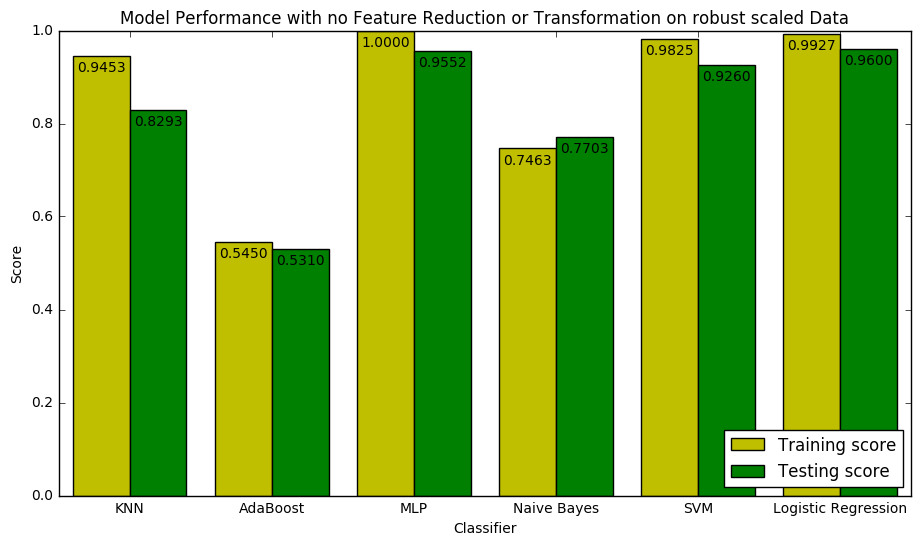

In [27]:
run_classifiers('no Feature Reduction or Transformation on robust scaled Data', robust_scaled_features_train, robust_scaled_features_test, labels_train, labels_test)

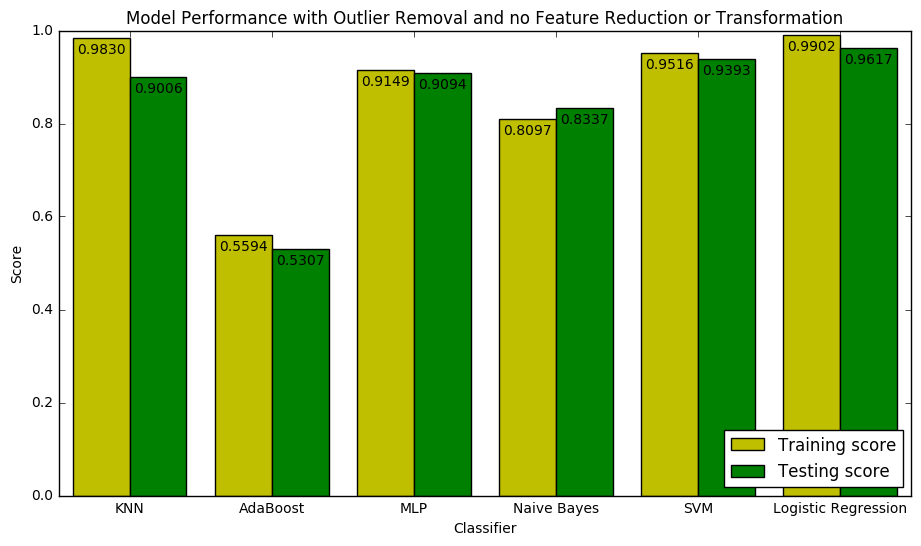

In [28]:
run_classifiers('Outlier Removal and no Feature Reduction or Transformation', features_train_removed_outliers, features_test, labels_train_removed_outliers, labels_test)

In [29]:
# Robust scaler looks like the most promising scaling choice. We assign the robust scaled data to a standard variable.
# If the scaler changes, we do not have to adapt the rest of the code
scaled_features_train = robust_scaled_features_train
scaled_features_test = robust_scaled_features_test

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(random_state=42)

# Apply extra trees classifier to the unscaled data
clf = clf.fit(features_train, labels_train)
model = SelectFromModel(clf, prefit=True)
features_train_etc_reduces = model.transform(features_train)
features_test_etc_reduces = model.transform(features_test)

# Apply extra trees classifier to the scaled data
clf = clf.fit(scaled_features_train, labels_train)
model = SelectFromModel(clf, prefit=True)
scaled_features_train_etc_reduces = model.transform(scaled_features_train)
scaled_features_test_etc_reduces = model.transform(scaled_features_test)

print('After applying the extra tree classifier to the unscaled data are {} features left.'.format(len(features_train_etc_reduces[0])))
print('After applying the extra tree classifier to the scaled data are {} features left.'.format(len(scaled_features_train_etc_reduces[0])))

After applying the extra tree classifier to the unscaled data are 89 features left.
After applying the extra tree classifier to the scaled data are 93 features left.


In [31]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)

# Apply random forest classifier to the unscaled data
clf = clf.fit(features_train, labels_train)
model = SelectFromModel(clf, prefit=True)
features_train_rtc_reduces = model.transform(features_train)
features_test_rtc_reduces = model.transform(features_test)

# Apply random forest classifier to the scaled data
clf = clf.fit(scaled_features_train, labels_train)
model = SelectFromModel(clf, prefit=True)
scaled_features_train_rtc_reduces = model.transform(scaled_features_train)
scaled_features_test_rtc_reduces = model.transform(scaled_features_test)

print('After applying the random forest classifier to the unscaled data are {} features left.'.format(len(features_train_rtc_reduces[0])))
print('After applying the random forest classifier to the scaled data are {} features left.'.format(len(scaled_features_train_rtc_reduces[0])))

After applying the random forest classifier to the unscaled data are 72 features left.
After applying the random forest classifier to the scaled data are 76 features left.


In [32]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)

# Apply PCA to the unscaled data
pca.fit(features_train)
features_train_pca_reduces = pca.transform(features_train)
features_test_pca_reduces = pca.transform(features_test)

# Apply PCA to the scaled data
pca.fit(scaled_features_train)
scaled_features_train_pca_reduces = pca.transform(scaled_features_train)
scaled_features_test_pca_reduces = pca.transform(scaled_features_test)

In [33]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA()

# Apply IncrementalPCA to the unscaled data
ipca.fit(features_train)
features_train_ipca_reduces = ipca.transform(features_train)
features_test_ipca_reduces = ipca.transform(features_test)

# Apply IncrementalPCA to the scaled data
ipca.fit(scaled_features_train)
scaled_features_train_ipca_reduces = ipca.transform(scaled_features_train)
scaled_features_test_ipca_reduces = ipca.transform(scaled_features_test)

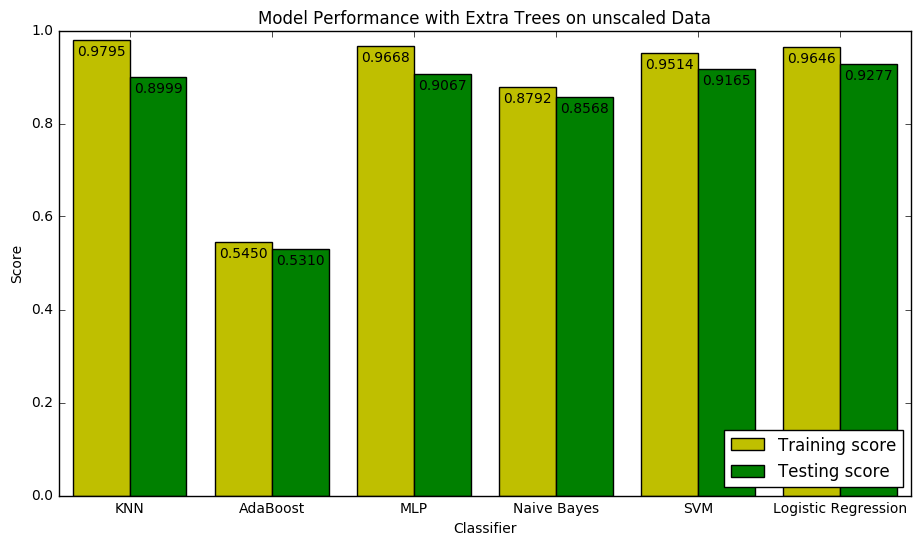

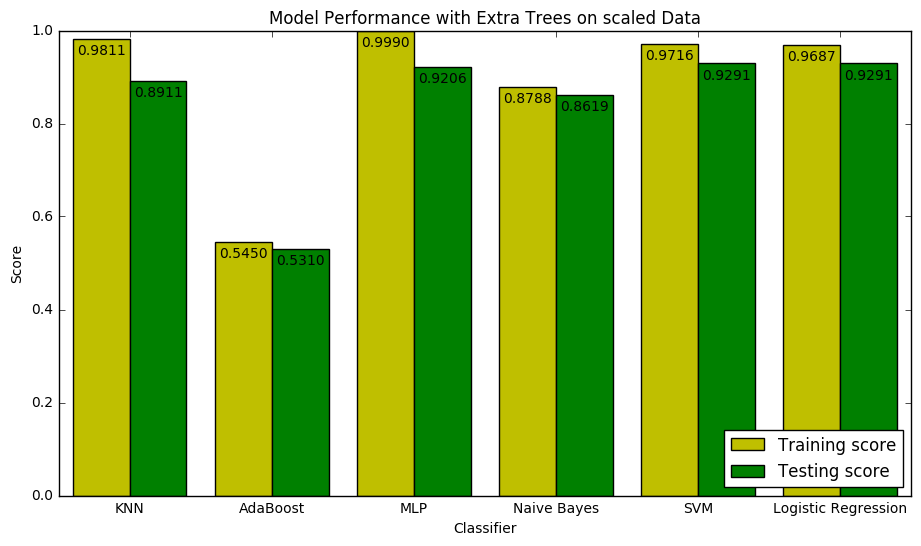

In [34]:
run_classifiers('Extra Trees on unscaled Data', features_train_etc_reduces, features_test_etc_reduces, labels_train, labels_test)
run_classifiers('Extra Trees on scaled Data', scaled_features_train_etc_reduces, scaled_features_test_etc_reduces, labels_train, labels_test)

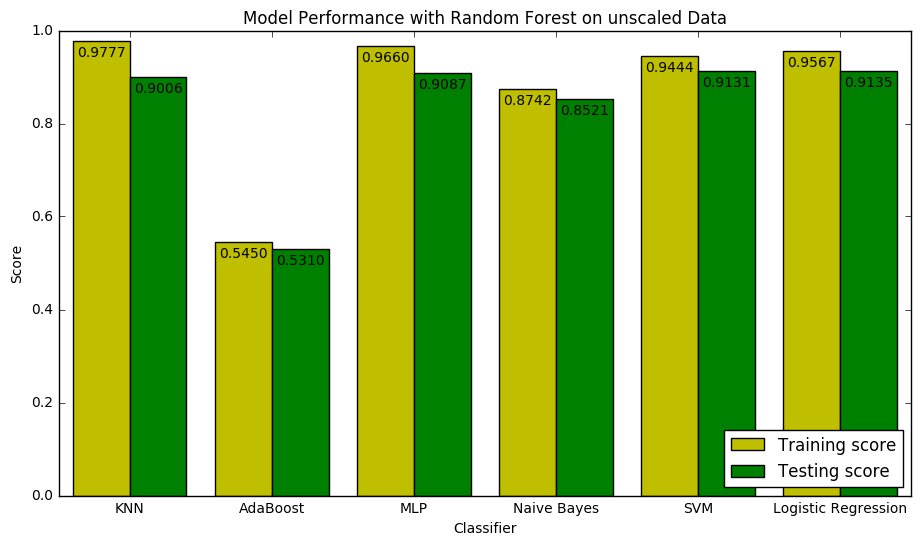

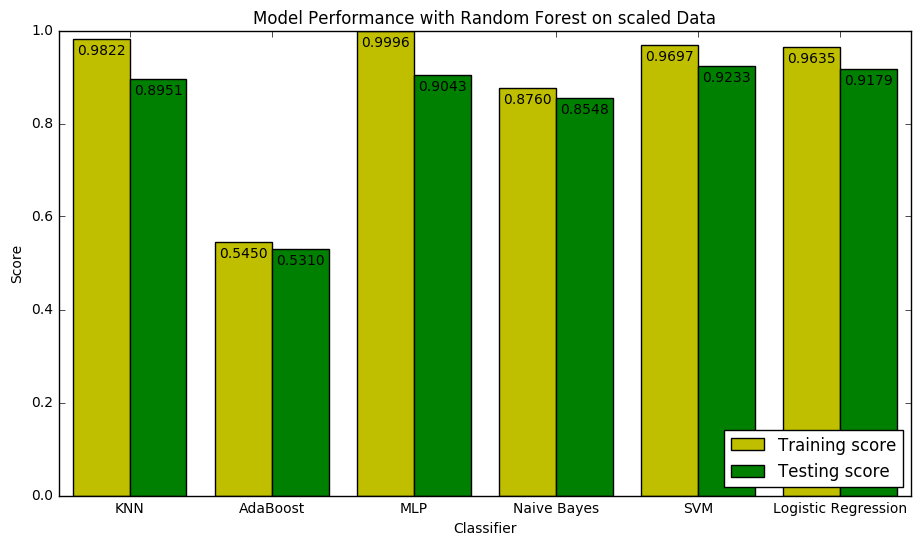

In [35]:
run_classifiers('Random Forest on unscaled Data', features_train_rtc_reduces, features_test_rtc_reduces, labels_train, labels_test)
run_classifiers('Random Forest on scaled Data', scaled_features_train_rtc_reduces, scaled_features_test_rtc_reduces, labels_train, labels_test)

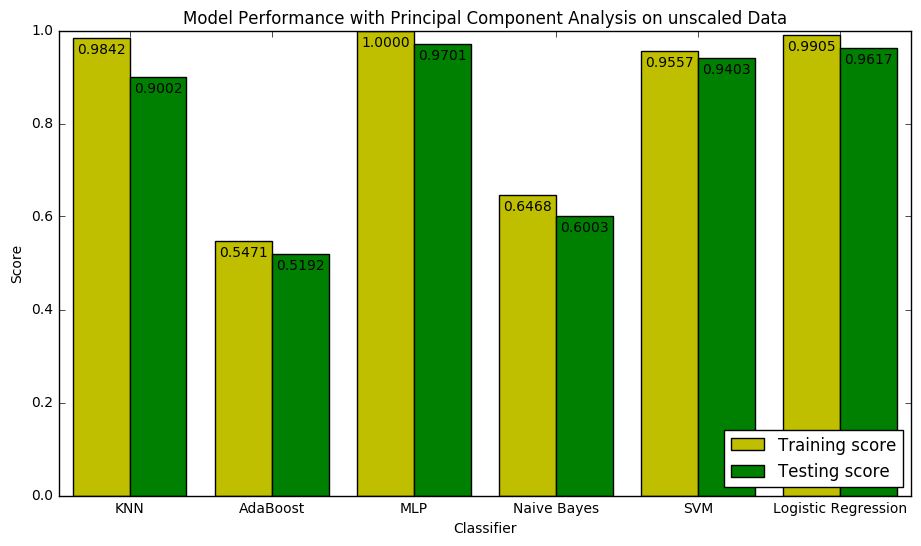

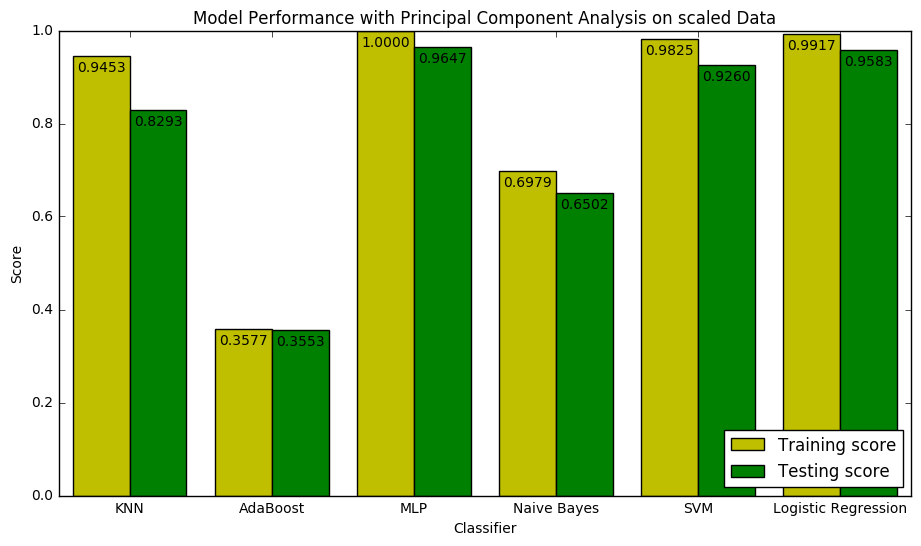

In [36]:
run_classifiers('Principal Component Analysis on unscaled Data', features_train_pca_reduces, features_test_pca_reduces, labels_train, labels_test)
run_classifiers('Principal Component Analysis on scaled Data', scaled_features_train_pca_reduces, scaled_features_test_pca_reduces, labels_train, labels_test)

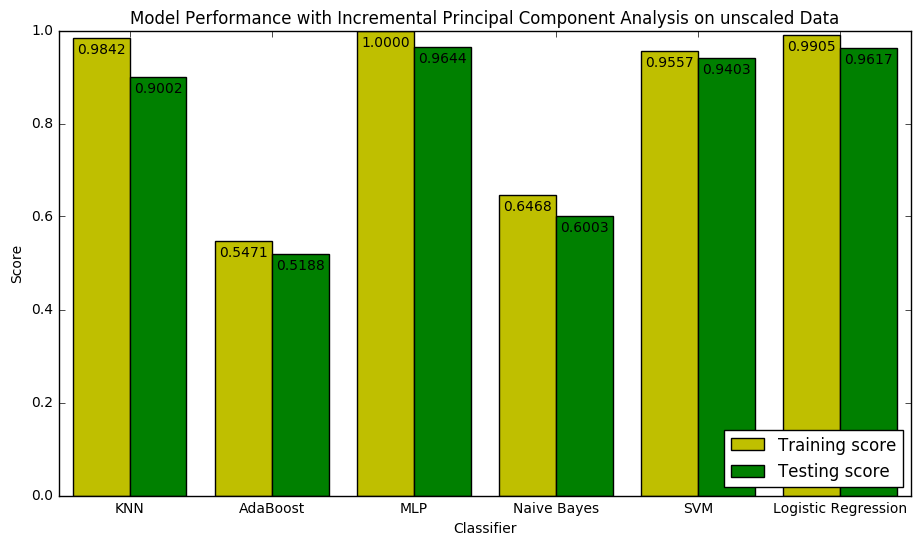

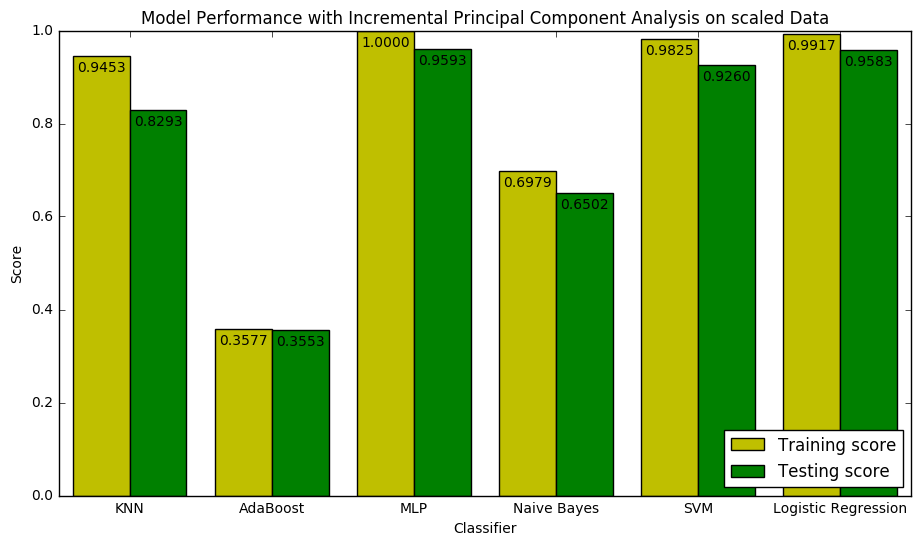

In [37]:
run_classifiers('Incremental Principal Component Analysis on unscaled Data', features_train_ipca_reduces, features_test_ipca_reduces, labels_train, labels_test)
run_classifiers('Incremental Principal Component Analysis on scaled Data', scaled_features_train_ipca_reduces, scaled_features_test_ipca_reduces, labels_train, labels_test)

In [38]:
# A method to tune the classifier
def tune_mlp(activation='relu', solver='adam', early_stopping=False):
    clf = MLPClassifier(random_state=42, activation=activation, solver=solver, early_stopping=early_stopping, max_iter=1000)
    clf.fit(features_train_pca_reduces, labels_train)
    prediction_train = clf.predict(features_train_pca_reduces)
    prediction_test = clf.predict(features_test_pca_reduces)
    return [accuracy_score(prediction_train, labels_train), accuracy_score(prediction_test, labels_test)]

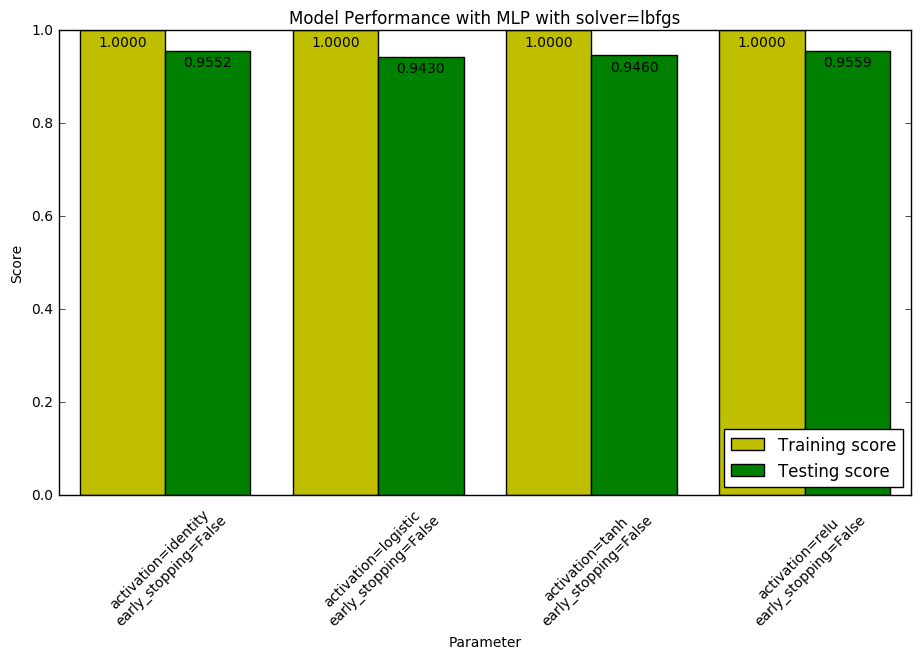

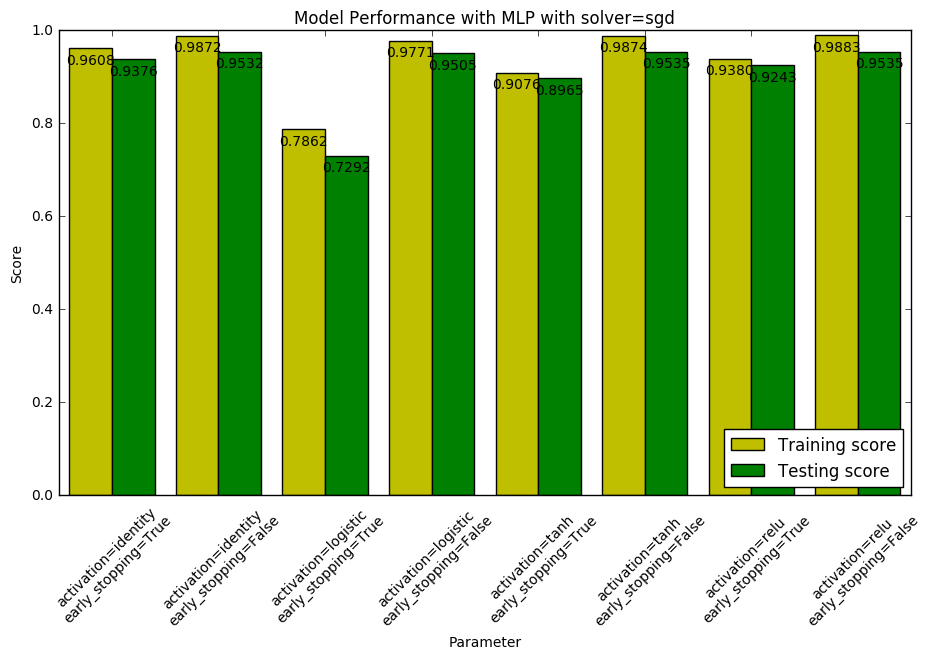

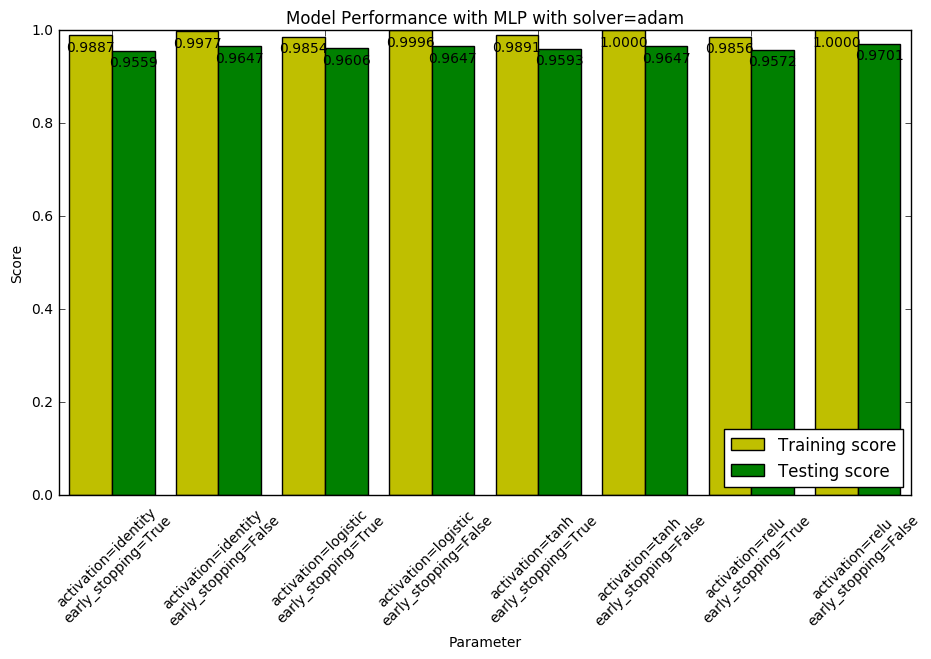

In [39]:
# The parameters which will be tuned
solver=['lbfgs', 'sgd', 'adam']
activation=['identity', 'logistic', 'tanh', 'relu']
early_stopping=[True, False]

# Interate through the parameters which will be tuned
for s in solver:
    # Reset the scores for a new plot
    scores = np.array([])
    for a in activation:
        for e in early_stopping:
            # Early stopping has no effect with solver lbfgs and can be scipped if true
            if s=='lbfgs' and e==True:
                continue
            # Build a list of the score
            score = ['activation={}\nearly_stopping={}'.format(a, e)]
            score.extend(tune_mlp(a, s, e))
            # Convert the list to a numpy array
            score = np.array([score])
            # Add the score to the scores which were alredy calculated
            if len(scores)==0:
                scores = score
            else:
                scores = np.concatenate((scores, score), axis=0)
    # Transpose the scores for the visualization method
    scores = scores.transpose()
    displayResult('MLP with solver={}'.format(s), scores[0], scores[1], scores[2], rotation=45, xlabel='Parameter')

In [40]:
# Apply the best parameter to the MLP classifier
clf = MLPClassifier(random_state=42, activation='relu', solver='adam', early_stopping=False)
clf.fit(features_train_pca_reduces, labels_train)
prediction_test = clf.predict(features_test_pca_reduces)

# Display the confusion matrix of the best model
pd.crosstab(labels_test, prediction_test, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted           LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 536        0         1        0                   0   
SITTING                  2      436        50        0                   0   
STANDING                 0       12       519        1                   0   
WALKING                  0        0         0      496                   0   
WALKING_DOWNSTAIRS       0        0         0        1                 413   
WALKING_UPSTAIRS         0        0         0       12                   0   
All                    538      448       570      510                 413   

Predicted           WALKING_UPSTAIRS   All  
True                                        
LAYING                             0   537  
SITTING                            3   491  
STANDING                           0   532  
WALKING                            0   496  
WALKING_DOWNSTAIRS                 6   420  
WALKING_UPSTAIRS                 459   471  
All                              468  2947

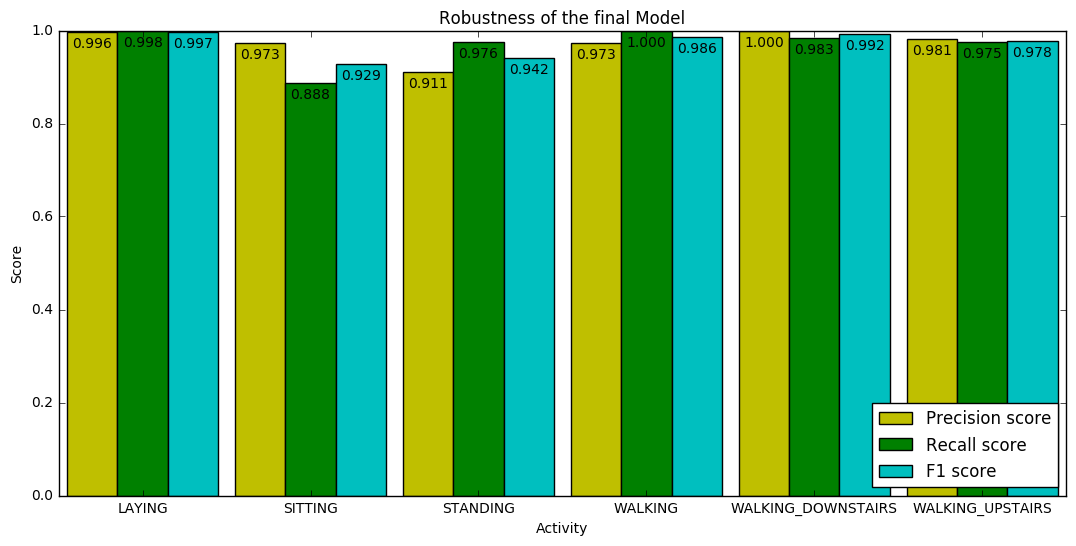

In [41]:
# Calculate the precision, recall and f1 scores to the the robustness
precision_scores = precision_score(labels_test, prediction_test, average=None)
recall_scores = recall_score(labels_test, prediction_test, average=None)
f1_scores = f1_score(labels_test, prediction_test, average=None)
activities = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

# Plot the scores in a bar chart
# The index for the bars
ind = np.arange(len(activities))
# The width of the bars
width = 0.3
# Scale the plot
fig, ax = plt.subplots(figsize=(13, 6))
rects1 = ax.bar(ind + 0.05, precision_scores, width, color='y')
rects2 = ax.bar(ind + width + 0.05, recall_scores, width, color='g')
rects3 = ax.bar(ind + 2*width + 0.05, f1_scores, width, color='c')
ax.set_xlabel('Activity')
ax.set_ylabel('Score')
ax.set_xticks(ind + 0.05 + 1.5*width)
# Assign and rotate the labels of the activities
ax.set_xticklabels(activities, rotation=0)
ax.set_title('Robustness of the final Model')
# Add a legend on the right lower corner
ax.legend((rects1[0], rects2[0], rects3[0]), ('Precision score', 'Recall score', 'F1 score'), loc=4)

# Round the score and display it on the bars
for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height-0.04, "{:.3f}".format(height), ha='center', va='bottom')
for rect in rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height-0.04, "{:.3f}".format(height), ha='center', va='bottom')
for rect in rects3:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height-0.04, "{:.3f}".format(height), ha='center', va='bottom')